## 초승달 형 데이터 세트 생성
- 선형 판별경계로 풀기 힘듦
- rbf, linear, poly kernel을 사용

In [1]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.352, random_state=1, n_samples=100)

X.shape, y.shape

((100, 2), (100,))

In [12]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([50, 50], dtype=int64))

In [7]:
%matplotlib inline

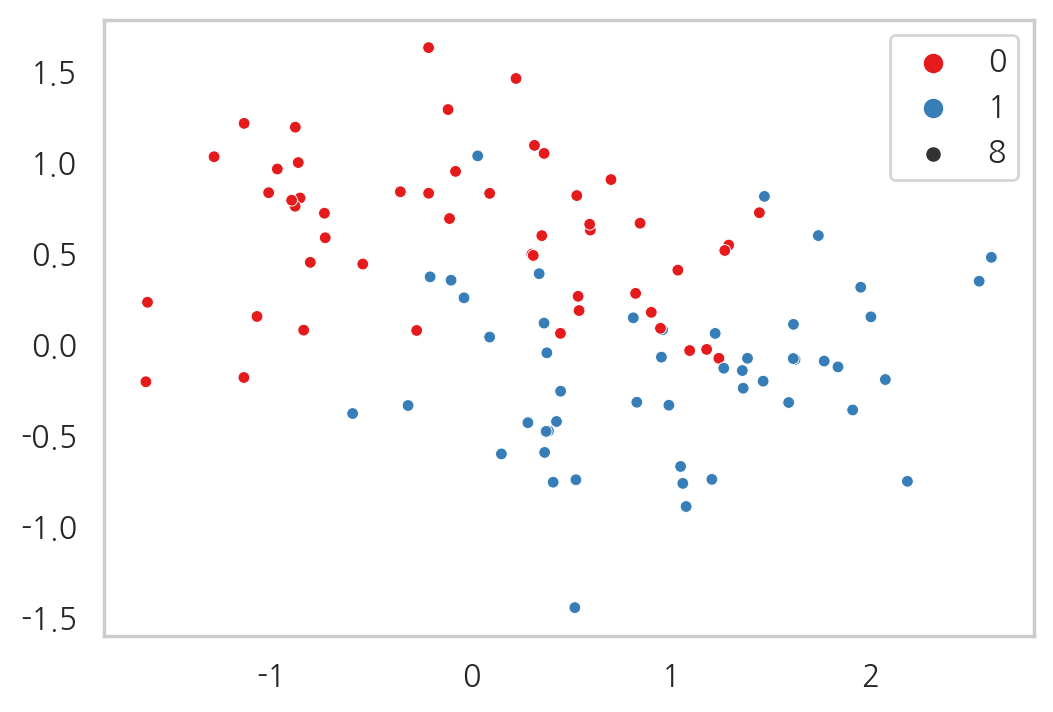

In [11]:
plt.figure()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker="o", size=8, palette="Set1")
plt.grid(False)
plt.show() ; 

## 모델링

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [6]:
%%time

svc = SVC(random_state=0)
param_grid = [
    {"kernel": ["linear"]},
    {"kernel": ["rbf"]},
    {"kernel": ["poly"], "degree": [2, 3]}
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)
gs = GridSearchCV(estimator=svc, param_grid=param_grid, scoring="roc_auc", cv=cv)
gs.fit(X, y)

CPU times: total: 1.06 s
Wall time: 1.13 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             estimator=SVC(random_state=0),
             param_grid=[{'kernel': ['linear']}, {'kernel': ['rbf']},
                         {'degree': [2, 3], 'kernel': ['poly']}],
             scoring='roc_auc')

## GCV의 fitting 결과

In [13]:
results_df = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_degree,params,split0_test_score,split1_test_score,split2_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001011,0.000099,0.001373,0.000482,rbf,NaN,{'kernel': 'rbf'},0.92,0.72,0.76,...,0.72,0.92,1.00,0.96,1.00,1.00,0.84,0.9400,0.079297,1
0,0.001024,0.000521,0.001420,0.000532,linear,NaN,{'kernel': 'linear'},0.96,0.84,0.76,...,0.76,0.92,1.00,0.92,0.92,1.00,0.84,0.9300,0.077846,2
3,0.001011,0.000100,0.001459,0.000497,poly,3,"{'degree': 3, 'kernel': 'poly'}",1.00,0.72,0.76,...,0.68,0.96,1.00,0.96,0.92,1.00,0.56,0.9044,0.098776,3
2,0.001106,0.000342,0.001505,0.000497,poly,2,"{'degree': 2, 'kernel': 'poly'}",0.76,0.64,0.56,...,0.52,0.48,0.68,0.68,0.76,0.84,0.52,0.6852,0.169106,4


## 모델별 성능

In [14]:
scores_summary = results_df[["params", "mean_test_score", "std_test_score", "rank_test_score"]]
scores_summary

,params,mean_test_score,std_test_score,rank_test_score
1,{'kernel': 'rbf'},0.9400,0.079297,1
0,{'kernel': 'linear'},0.9300,0.077846,2
3,"{'degree': 3, 'kernel': 'poly'}",0.9044,0.098776,3
2,"{'degree': 2, 'kernel': 'poly'}",0.6852,0.169106,4


In [17]:
model_scores = results_df.filter(regex="^(split)").set_index(
    results_df["params"].apply(lambda x : "_".join([str(v) for v in x.values()])))
model_scores.index.name = "kernel"
model_scores

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,...,split90_test_score,split91_test_score,split92_test_score,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score
kernel,,,,,,,,,,,,,,,,,,,,,
rbf,0.92,0.72,0.76,0.92,1.00,1.00,1.00,1.00,0.96,1.00,...,0.96,0.88,1.00,0.72,0.92,1.00,0.96,1.00,1.00,0.84
linear,0.96,0.84,0.76,0.92,1.00,0.96,0.96,1.00,0.92,1.00,...,0.96,0.92,1.00,0.76,0.92,1.00,0.92,0.92,1.00,0.84
3_poly,1.00,0.72,0.76,0.92,1.00,0.88,0.96,0.84,0.96,0.96,...,0.92,0.92,1.00,0.68,0.96,1.00,0.96,0.92,1.00,0.56
2_poly,0.76,0.64,0.56,0.72,0.28,0.68,0.76,1.00,0.72,0.64,...,0.68,0.60,0.88,0.52,0.48,0.68,0.68,0.76,0.84,0.52


In [18]:
model_scores.mean(axis=1)

kernel
rbf       0.9400
linear    0.9300
3_poly    0.9044
2_poly    0.6852
dtype: float64

## 모델별 100번의 측정 성능
- model의 성능의 변화에 의존성이 있는 것으로 보임

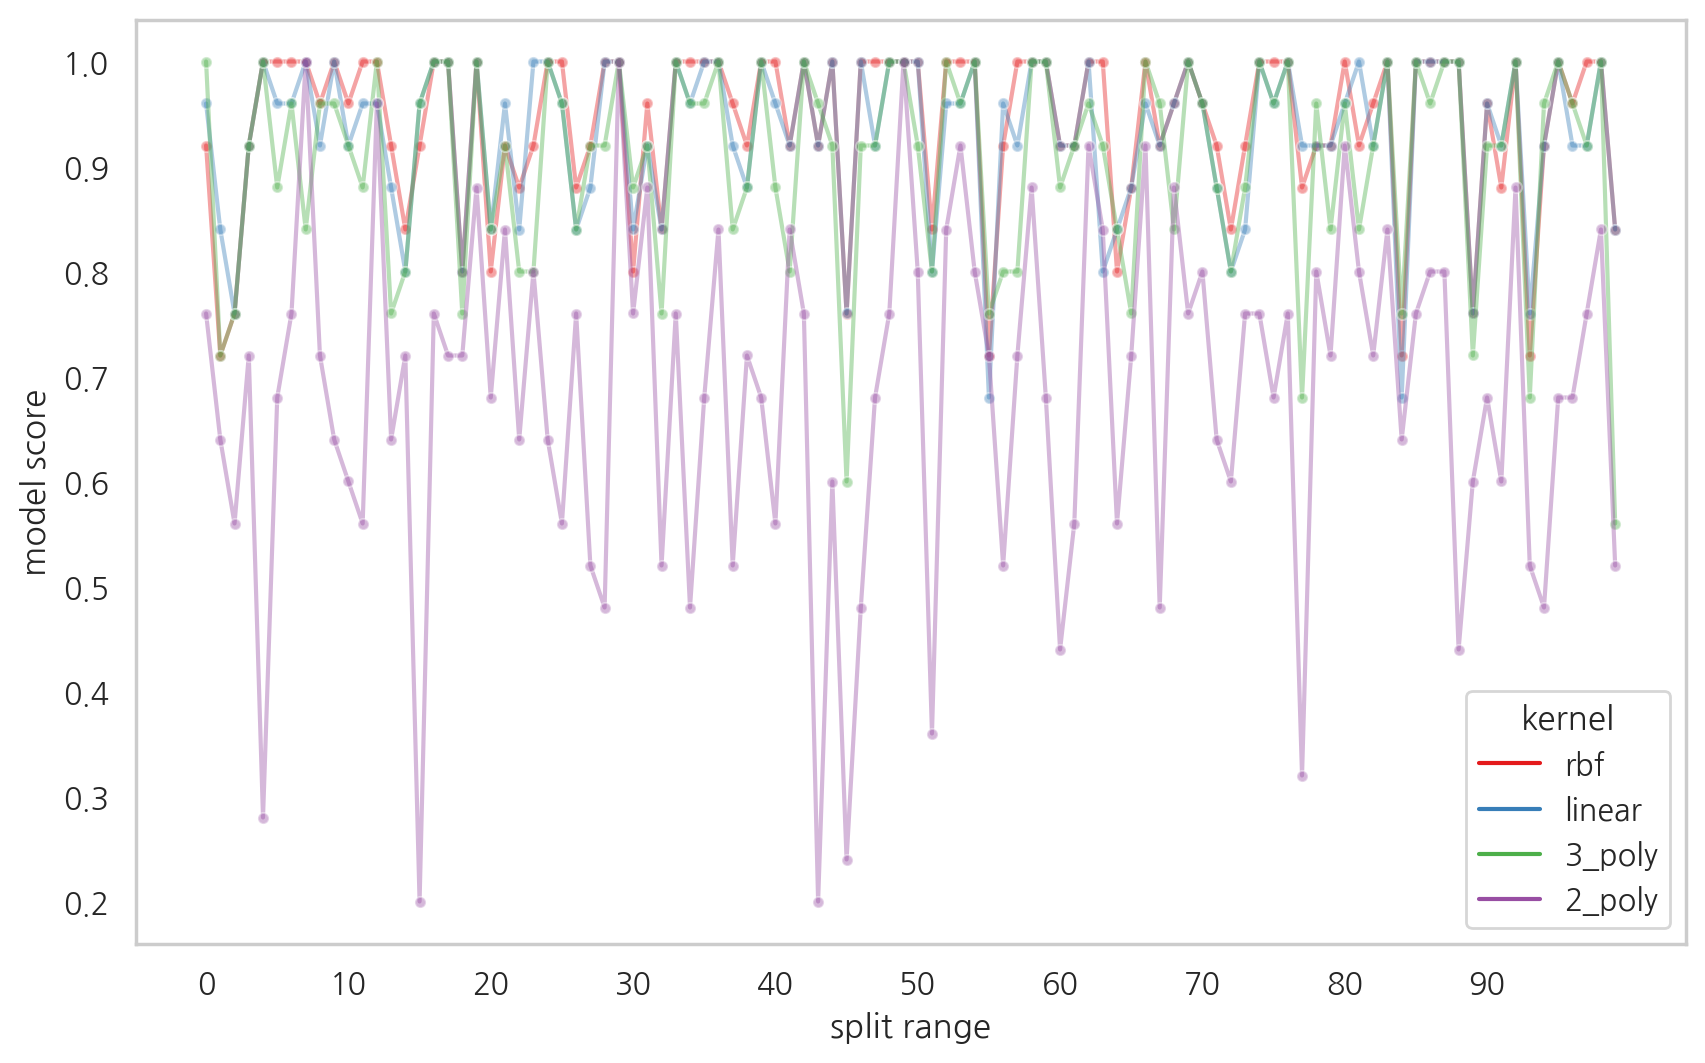

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(model_scores.T, dashes=False, palette="Set1", marker="o", ms=4, alpha=0.4)
plt.xticks(np.arange(0, 100, 10), np.arange(0, 100, 10))
plt.xlabel("split range")
plt.ylabel("model score")
plt.grid(False)
plt.show() ; 

## 모델 성능의 의존성
- 즉 상호관계성이 높은 모델들은 성능의 작은 차이를 무시하고 같은 성능을 가졌다고 판단할 수 있을까?

In [25]:
model_scores.T.corr()

kernel,rbf,linear,3_poly,2_poly
kernel,,,,
rbf,1.000000,0.882561,0.783392,0.351390
linear,0.882561,1.000000,0.746492,0.298688
3_poly,0.783392,0.746492,1.000000,0.355440
2_poly,0.351390,0.298688,0.355440,1.000000


## 모델의 성능 평가 : 빈도주의적 접근
- corrected paire t-test, p-value로 가설 검증
- uncorrected t-test, p-value로 가설 검증

In [39]:
def corrected_std(diff, n_train, n_test) : 
    
    kr = len(diff)
    corrected_var = np.var(diff, ddof=1) * (1/kr + n_test/n_train)
    corrected_std = np.sqrt(corrected_var)
    
    return corrected_std

In [28]:
from scipy.stats import t

In [40]:
def compute_corrected_statics(diff, n_train, n_test, df) : 
    
    mean = np.mean(diff)
    std = corrected_std(diff, n_train, n_test)
    t_test = mean / std
    p_value = t.sf(np.abs(t_test), df)
    
    return t_test, p_value

In [41]:
model_1_scores = model_scores.iloc[0].values
model_2_scores = model_scores.iloc[1].values
diff = model_1_scores - model_2_scores
n = len(diff)
df = n - 1

n, df

(100, 99)

In [42]:
n_train, n_test = len(list(cv.split(X, y))[0][0]), len(list(cv.split(X, y))[0][1])
n_train, n_test

(90, 10)

#### 귀무가설 채택

In [43]:
t_test, p_value = compute_corrected_statics(diff, n_train, n_test, df)

print(f"corrected of t-test : {t_test:.3f}")
print(f"corrected of p-value : {p_value:.3f}")

corrected of t-test : 0.750
corrected of p-value : 0.227


#### 귀무가설 기각

In [44]:
uncorrected_t_test = np.mean(diff) / np.sqrt(np.var(diff, ddof=1)/n)
uncorrected_p_value = t.sf(np.abs(uncorrected_t_test), df)

print(f"uncorrected of t-test : {uncorrected_t_test:.3f}")
print(f"uncorrected of p-value : {uncorrected_p_value:.3f}")

uncorrected of t-test : 2.611
uncorrected of p-value : 0.005


## 모델 성능 평가 : 베이즈 추정법
- 베이즈 추정법을 사용하여 모델의 성능을 비교
- 사전확률분포를 켤레사전확률분포인 정규-감마분포를 사용하여, 사후확률의 분포를 정규분포로 정의함
   - 사전확률분포를 켤레사전확률분포로 정의하면 사후확률의 분포가 이 켤레사전확률분포와 형태가 같아진다.
- pdf와 cdf를 통해 성능차이 구간의 확률을 추정하여 비교

In [45]:
# posterior prob dist : student-t

t_post = t(df, loc=np.mean(diff), scale=corrected_std(diff, n_train, n_test))
t_post

#### 성능차이라는 데이터 표본에 대한 모수의 조건부확률분포
- 성능차이라는 데이터 표본이 주어졌을 때 모수 mu의 조건부확률의 pdf
- 베이즈 추정에 의해 사후확률분포에 해당

In [46]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

x.min(), x.max()

(-0.03231041089954392, 0.05231041089954389)

In [47]:
np.mean(diff)

0.009999999999999986

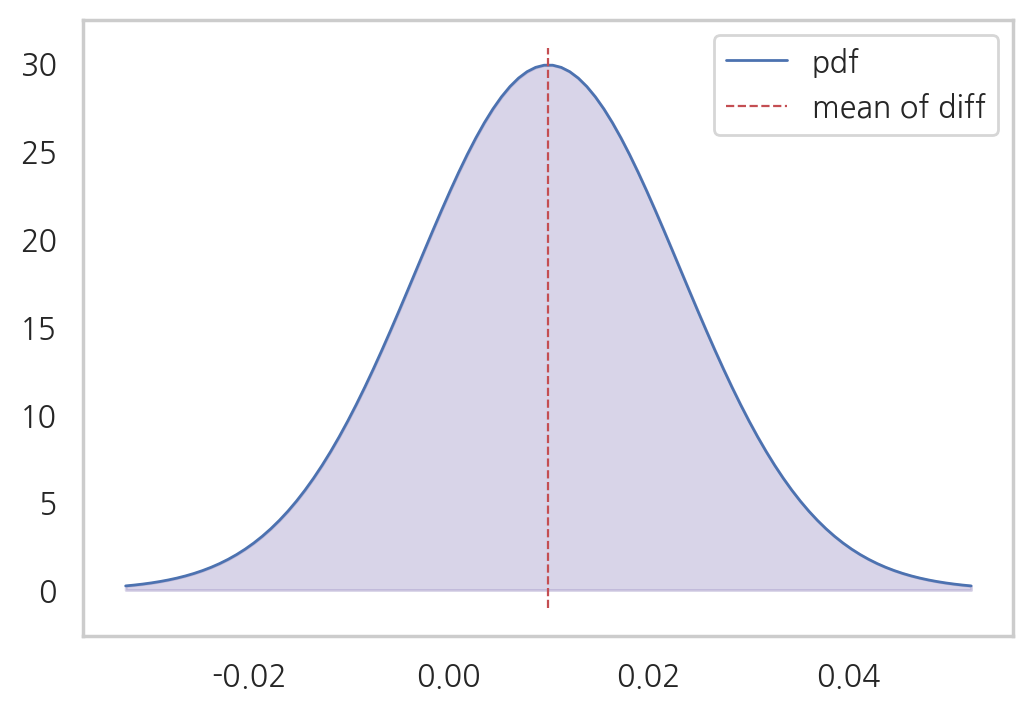

In [52]:
plt.figure()
plt.plot(x, t_post.pdf(x), color="b", linestyle="-", linewidth=1, label="pdf")
plt.fill_between(x, t_post.pdf(x), color="m", alpha=0.3)
plt.vlines(np.mean(diff), ymin=0-1, ymax=np.max(t_post.pdf(x))+1, color="r", linestyle="--", linewidth=0.8, label="mean of diff")
plt.legend(loc="best")
plt.grid(False)
plt.show() ; 

#### 귀무가설 검정
- model1이 model2 보다 성능이 좋다. : 우측검정
- model1이 model2 보다 성능이 안좋다. : 좌측검정

In [53]:
better_prob = 1 - t_post.cdf(0)
worst_prob = t_post.cdf(0)

print(f"model1 better than model2 : {better_prob:.3f}")
print(f"model1 lower than model2 : {worst_prob:.3f}")

model1 better than model2 : 0.773
model1 lower than model2 : 0.227


#### 귀무가설 검정 : practical model equal 
- model1과 model2의 성능은 같다. = mu=0
   - ROPE : [-0.01, 0.01]
- 두 모델의 성능이 같을 확률 : 0.432, 43%

In [54]:
interval_rope = [-0.01, 0.01]
practical_equal_prob = t_post.cdf(interval_rope[1]) - t_post.cdf(interval_rope[0])

print(f"practical prob of model1 equal model2 : {practical_equal_prob:.3f}")

practical prob of model1 equal model2 : 0.432


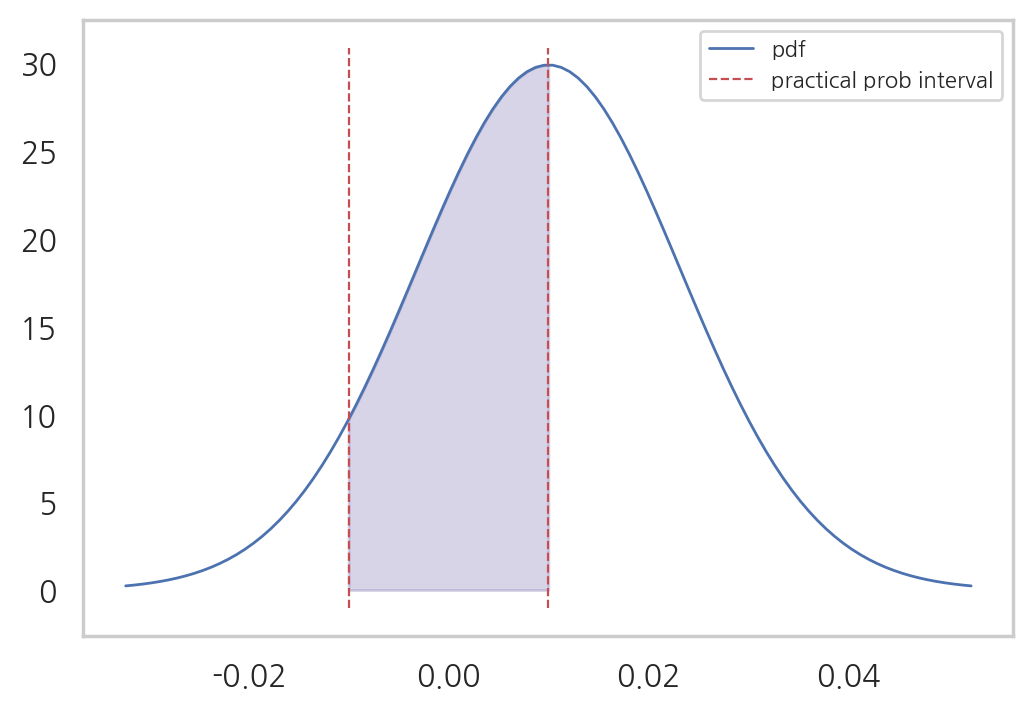

In [62]:
interval_x = np.linspace(interval_rope[0], interval_rope[1], 100)
plt.figure()
plt.plot(x, t_post.pdf(x), color="b", linestyle="-", linewidth=1, label="pdf")
plt.fill_between(interval_x, t_post.pdf(interval_x), color="m", alpha=0.3)
plt.vlines(interval_rope, ymin=-1, ymax=np.max(t_post.pdf(x))+1, 
           color="r", linestyle="--", linewidth=0.8, label="practical prob interval")
plt.legend(loc="best", fontsize=8)
plt.grid(False)
plt.show() ; 

#### 구간별 확률(=면적)

In [63]:
probs_ = [0.5, 0.75, 0.95]
lst = []

for p in probs_ : 
    cred_range = t_post.interval(p)
    lst.append(cred_range)

In [71]:
cred_range_df = pd.DataFrame(np.c_[np.array(probs_), np.array(lst)], columns=["prob", "low", "high"]).set_index("prob")
cred_range_df

,low,high
prob,,
0.50,0.000977,0.019023
0.75,-0.005422,0.025422
0.95,-0.016445,0.036445


## 모든 모델의 비교 : 빈도주의적 방법

In [73]:
from itertools import combinations
from math import factorial

In [74]:
len(model_scores)

4

In [75]:
n_comparison = factorial(len(model_scores)) / (factorial(2) * factorial(len(model_scores)) - 2)
n_comparison

0.5217391304347826

In [76]:
datas = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    model_i_score = model_scores.iloc[model_i].values
    model_k_score = model_scores.iloc[model_k].values
    diff = model_i_score - model_k_score
    t_test, p_value = compute_corrected_statics(diff, n_train, n_test, df)
    p_value *= n_comparison
    p_value = 1 if p_value > 1 else p_value
    datas.append([model_scores.index[model_i], model_scores.index[model_k], t_test, p_value])

In [78]:
compare_corrected_statics = pd.DataFrame(datas, columns=["model_1", "model_2", "t-test", "p-value"]).round(3)
compare_corrected_statics

,model_1,model_2,t-test,p-value
0,rbf,linear,0.750,0.119
1,rbf,3_poly,1.657,0.026
2,rbf,2_poly,4.565,0.000
3,linear,3_poly,1.111,0.070
4,linear,2_poly,4.276,0.000
5,3_poly,2_poly,3.851,0.000


## 모든 모델의 비교 : 베이즈 추정법

In [79]:
datas = []

for model_i, model_k in combinations(range(len(model_scores)), 2) : 
    model_i_score = model_scores.iloc[model_i].values
    model_k_score = model_scores.iloc[model_k].values
    diff = model_i_score - model_k_score
    t_post = t(df, loc=np.mean(diff), scale=corrected_std(diff, n_train, n_test))
    worst_prob = t_post.cdf(0)
    better_prob = 1 - t_post.cdf(0)
    practical_prob = t_post.cdf(interval_rope[1]) - t_post.cdf(interval_rope[0])
    datas.append([model_scores.index[model_i], model_scores.index[model_k], worst_prob, better_prob, practical_prob])

In [81]:
compare_bayesian = pd.DataFrame(datas, columns=["model_1", "model_2", "worst-prob", "better-prob", "prac-prob"]).round(3)
compare_bayesian

,model_1,model_2,worst-prob,better-prob,prac-prob
0,rbf,linear,0.227,0.773,0.432
1,rbf,3_poly,0.050,0.950,0.100
2,rbf,2_poly,0.000,1.000,0.000
3,linear,3_poly,0.135,0.865,0.187
4,linear,2_poly,0.000,1.000,0.000
5,3_poly,2_poly,0.000,1.000,0.000


In [86]:
statics_compare_model = compare_corrected_statics.join(compare_bayesian.iloc[:, 2:])
statics_compare_model

,model_1,model_2,t-test,p-value,worst-prob,better-prob,prac-prob
0,rbf,linear,0.750,0.119,0.227,0.773,0.432
1,rbf,3_poly,1.657,0.026,0.050,0.950,0.100
2,rbf,2_poly,4.565,0.000,0.000,1.000,0.000
3,linear,3_poly,1.111,0.070,0.135,0.865,0.187
4,linear,2_poly,4.276,0.000,0.000,1.000,0.000
5,3_poly,2_poly,3.851,0.000,0.000,1.000,0.000
